In [ ]:
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
from src.preprocessing.drop_cols import drop_unused_columns

ModuleNotFoundError: No module named 'code.preprocessing'; 'code' is not a package

In [ ]:
# Raakadata nimetty muotoon raw_data.csv
df = pd.read_csv("../data/raw_data.csv")
df.head(5)

C:\Users\metal\AppData\Local\Temp\ipykernel_45384\3426955398.py:2: DtypeWarning: Columns (28,30,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw_data.csv")


,collected_at,backers_count,blurb,category_id,category_name,category_parent_id,category_parent_name,category_url,converted_pledged_amount,country,...,profile_state_changed_at,project_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_exchange_rate,usd_pledged,usd_type
0,202505,185341,A Year of Sanderson: Enjoy books and swag boxe...,47.0,Fiction,18,Publishing,http://www.kickstarter.com/discover/categories...,41754153.0,US,...,1.648768e+09,https://www.kickstarter.com/projects/dragonste...,True,True,successful,1648767600,1.0,1.0,41754153.24,domestic
1,202505,78471,Color e-paper smartwatch with up to 7 days of ...,28.0,Product Design,7,Design,http://www.kickstarter.com/discover/categories...,20338986.0,US,...,1.427590e+09,https://www.kickstarter.com/projects/getpebble...,True,True,successful,1427508015,1.0,1.0,20338986.27,domestic
2,202505,55106,Beginning with The Stormlight Archive and expa...,34.0,Tabletop Games,12,Games,http://www.kickstarter.com/discover/categories...,15149874.0,US,...,1.726001e+09,https://www.kickstarter.com/projects/brotherwi...,True,True,successful,1724986800,1.0,1.0,15149874.00,domestic
3,202505,62642,The COOLEST is a portable party disguised as a...,28.0,Product Design,7,Design,http://www.kickstarter.com/discover/categories...,13285226.0,US,...,1.428101e+09,https://www.kickstarter.com/projects/ryangrepp...,True,False,successful,1409360410,1.0,1.0,13285226.36,domestic
4,202505,83193,Euro-inspired dungeon crawling sequel to the 2...,34.0,Tabletop Games,12,Games,http://www.kickstarter.com/discover/categories...,12969608.0,US,...,1.588367e+09,https://www.kickstarter.com/projects/frosthave...,True,True,successful,1588366800,1.0,1.0,12969608.00,domestic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629147 entries, 0 to 629146
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   collected_at              629147 non-null  int64  
 1   backers_count             629147 non-null  int64  
 2   blurb                     629090 non-null  object 
 3   category_id               523018 non-null  float64
 4   category_name             523018 non-null  object 
 5   category_parent_id        629147 non-null  int64  
 6   category_parent_name      629147 non-null  object 
 7   category_url              583584 non-null  object 
 8   converted_pledged_amount  566772 non-null  float64
 9   country                   629147 non-null  object 
 10  created_at                629147 non-null  int64  
 11  creator_id                629147 non-null  int64  
 12  creator_name              629144 non-null  object 
 13  creator_url               629147 non-null  o

In [ ]:
drop_unused_columns(df)

In [ ]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.isnull().sum()

collected_at                     0
backers_count                    0
blurb                           57
category_id                 106129
category_name               106129
category_parent_id               0
category_parent_name             0
category_url                 45563
converted_pledged_amount     62375
country                          0
created_at                       0
creator_id                       0
creator_name                     3
creator_url                      0
currency                         0
deadline                         0
fx_rate                      54779
goal                             0
id                               0
launched_at                      0
location_country              1837
location_id                   1825
location_name                 1825
location_state                1995
location_type                 1923
name                             5
percent_funded              106450
pledged                          0
profile_blurb       

Profile on meidän skoopissa melko tarpeeton tieto, lisäksi sieltä runsas määrä puuttuvaa dataa. Voidaanko tiputtaa?  
percent_funded sisältää runsaasti puuttuvia tietoja, mutta näyttäisi siltä, että sen voisi laskea itse. pledged/goal  
valuuttakurssit?  
  
Pois jätettäviä:
- category_url
- profiilitiedot
- spotlight/staff_pick?
- saavutettuun rahamäärään viittaavat?

In [ ]:
df["currency"].value_counts()

currency
USD    435023
GBP     64890
EUR     53183
CAD     29222
AUD     14960
MXN      7942
HKD      6500
SEK      3483
SGD      2940
JPY      2853
NZD      2588
DKK      2046
CHF      1935
NOK      1116
PLN       466
Name: count, dtype: int64

In [ ]:
df["category_name"].value_counts()

category_name
Tabletop Games     52495
Product Design     44069
Video Games        21773
Documentary        19302
Fiction            16862
                   ...  
horror                 1
gaming hardware        1
makerspaces            1
cookbooks              1
fine art               1
Name: count, Length: 219, dtype: int64

In [ ]:
df["category_parent_name"].value_counts()

category_parent_name
Games           95316
Film & Video    85846
Publishing      67038
Music           65754
Design          55671
Technology      53333
Art             51429
Fashion         39350
Food            33498
Comics          29358
Photography     13797
Theater         13202
Crafts          12972
Journalism       6474
Dance            4513
comics           1596
Name: count, dtype: int64

Pääkategorioita 16 kpl, alakategorioita 219 kpl, joissa osassa yksittäisiä rivejä.  
Pitäisikö pudottaa alakategoriat pois?  


In [ ]:
# Tallentaa 150 rivin samplen omaan csv-tiedostoon
# df.sample(150).to_csv("sample.csv")


## Projektin kesto
- Varainkeruun kesto määrätty 1 - 60 vuorokauteen. Joissakin vanhemmissa projekteissa saattanut olla pidempi aika.
- Datan perusteella näyttäisi "terveet" kestot jakautuvan 1 - 120 päivään, keskiarvo 33,9 vuorokautta. Tästä poikkeavat virheellistä dataa, joka pitää tarkistaa onko korjattavissa.  
- 0 kestoisista puuttuu sekä launched ja deadline, nämä mahdollisesti poistoon.
- Tuhansia päiviä kestäneistä projekteissa on virheellinen alkupäivä. Nämä voitaisiin "korjata" laskemalla alkupäivä keston keskiarvoa käyttämällä.

In [ ]:
# df[(df["launched_at"] == 0) & (df["deadline"] != 0)].count()

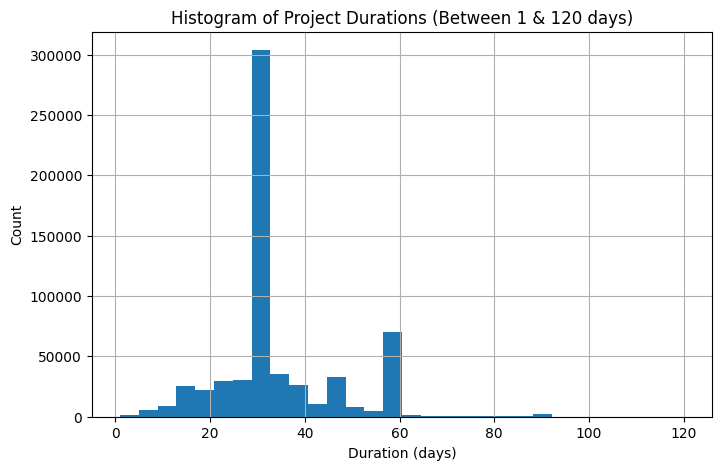

In [ ]:
# Unix → datetime (päivän tarkkuudella)
df["launched_date"] = pd.to_datetime(df["launched_at"], unit="s").dt.floor("D")
df["deadline_date"] = pd.to_datetime(df["deadline"], unit="s").dt.floor("D")

# Kesto päivinä (kokonaislukuna)
df["duration_days"] = (df["deadline_date"] - df["launched_date"]).dt.days

# Poikkeavat arvot: < 1 päivä tai > 60 päivää
duration = df[(df["duration_days"] >= 1) & (df["duration_days"] <= 120)]


# Histogrammi
plt.figure(figsize=(8, 5))
plt.hist(duration["duration_days"].dropna(), bins=30)
plt.xlabel("Duration (days)")
plt.ylabel("Count")
plt.title("Histogram of Project Durations (Between 1 & 120 days)")
plt.grid(True)
plt.show()

In [ ]:
duration["duration_days"].mean()

np.float64(33.88577429764769)

In [ ]:
mean_rates = df.groupby("currency")["usd_exchange_rate"].mean()
print(mean_rates)

currency
AUD    0.736407
CAD    0.776630
CHF    1.048669
DKK    0.150603
EUR    1.113321
GBP    1.370675
HKD    0.128137
JPY    0.007918
MXN    0.051632
NOK    0.116285
NZD    0.685441
PLN    0.246082
SEK    0.111160
SGD    0.734442
USD    0.987375
Name: usd_exchange_rate, dtype: float64


In [ ]:
fx_df = df.loc[df["currency"] != "USD", [
    "currency",
    "fx_rate",
    "usd_exchange_rate",
    "static_usd_rate",
    "launched_date",
    "deadline_date"
]]

fx_df.head(20)

,currency,fx_rate,usd_exchange_rate,static_usd_rate,launched_date,deadline_date
20,EUR,1.135133,1.216960,1.218138,2021-05-25,2021-06-11
24,HKD,0.128924,0.127432,0.127403,2022-05-31,2022-06-30
26,EUR,1.135133,1.083636,1.084473,2024-01-30,2024-02-29
33,GBP,1.308200,1.255326,1.231790,2020-05-28,2020-06-18
35,GBP,1.308200,1.266438,1.274770,2018-12-05,2018-12-28
38,HKD,0.128924,0.128987,0.129003,2020-12-15,2021-01-29
48,GBP,1.308200,1.436484,1.416631,2016-04-19,2016-05-16
53,GBP,1.308200,1.216535,1.256915,2019-07-16,2019-08-08
54,SGD,0.757800,0.746943,0.744485,2023-03-14,2023-05-13
55,EUR,1.135133,1.214980,1.185917,2020-11-18,2021-01-14


In [ ]:
fx_df["static_usd_rate"].isnull().sum()

np.int64(4907)

In [ ]:
missing_fx = df[df["fx_rate"].isna()] \
               .groupby("currency")["fx_rate"] \
               .count() \
               .sort_values(ascending=False)

print(missing_fx)

currency
AUD    0
CAD    0
CHF    0
DKK    0
EUR    0
GBP    0
HKD    0
MXN    0
NOK    0
NZD    0
SEK    0
SGD    0
USD    0
Name: fx_rate, dtype: int64


In [ ]:
df["location_type"].value_counts()

location_type
Town             586474
County            19273
Suburb            15015
LocalAdmin         4452
Zip                1142
Island              778
Country              44
Miscellaneous        36
Estate               10
Name: count, dtype: int64